# Week 7 Module 3 Assignment 1
## Francis Yang 11/14/2022
### Linear Regression on Boston Dataset

*	Load Boston Data Set from sklearn.datasets, use
*	Assign data to X and target to y
*	Check the shape of the dataset
*	Plot the scatter plot of each attribute versus MEDV
*	Split the dataset into test and train datasets, you can set the random seed to 42 by random_state=42
*	run cross validation for the train and test datasets for cv=10
*	print the mean score for the cross validation using linear regressor (LinearRegressor())
*	do the same two steps above for random forest regressor. For that you can import `from sklearn.ensemble import RandomForestRegressor`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\12099\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
X = boston.data
y = boston.target
print(X.shape,y.shape)

(506, 13) (506,)


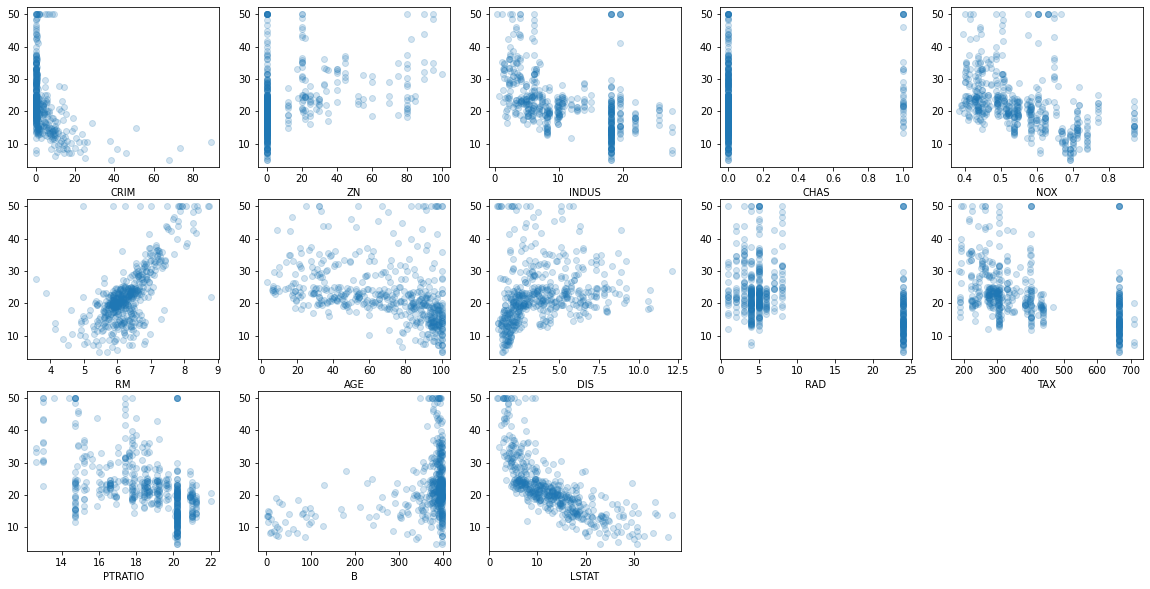

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    x = X[:, i]    #index numpy array
    ax.scatter(x, y, alpha=0.2)
    ax.set_xlabel(boston['feature_names'][i])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg = LinearRegression()
train_score = cross_val_score(reg, X_train, y_train, cv=10)
test_score = cross_val_score(reg, X_test, y_test, cv=10)
print("CV Train",train_score.mean(),"CV Test",test_score.mean())

CV Train 0.7160133196648378 CV Test 0.5956404444783074


In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
train_score = cross_val_score(rf, X_train, y_train, cv=10)
test_score = cross_val_score(rf, X_test, y_test, cv=10)
print("CV Train",train_score.mean(),"CV Test",test_score.mean())

CV Train 0.8472922447910299 CV Test 0.7469835752726625


### Boston Housing Data with Polynomials
*	Transform the Boston House dataset and split the dataset into test and train datasets
*	Run cross-validation
*	Plot the coefficients of the model


In [10]:
from sklearn.preprocessing import PolynomialFeatures, scale

poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(scale(X))
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.8065638995073062

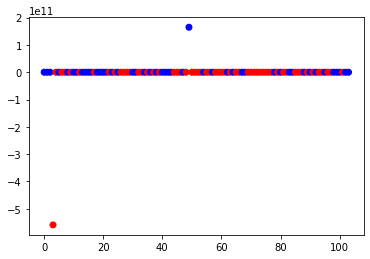

In [11]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]),lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")